In [18]:
pip install pandas numpy matplotlib seaborn scipy sklearn imblearn missingno plotly feature-engine category_encoders featuretools statsmodels umap-learn tensorflow joblib shap tpot auto-sklearn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [2]:
import pandas as pd

# Load dataset from CSV
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display first 5 rows
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print("Shape:", df.shape)  # Output: (891, 12)


Shape: (891, 12)


In [4]:
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
print("Memory usage (MB):", df.memory_usage(deep=True).sum() / (1024 ** 2))


Memory usage (MB): 0.2789154052734375


In [6]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Age Statistics:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Distribution Shape:
Skewness: 0.39 (Right-skewed)
Kurtosis: 0.18 (Heavier tails than normal)


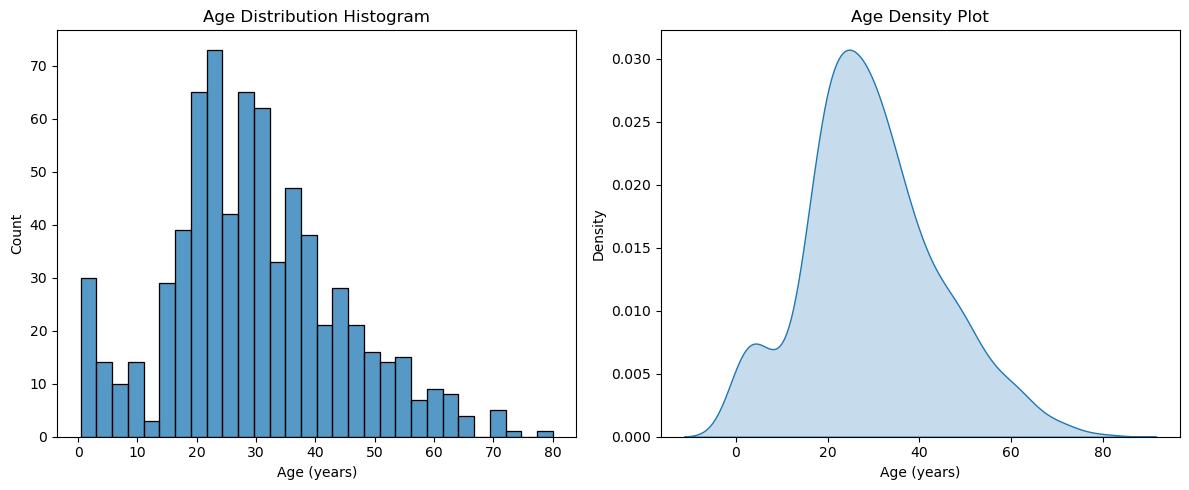

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Analyzing the Age distribution
age_stats = df['Age'].describe()
age_skew = df['Age'].skew()
age_kurtosis = df['Age'].kurtosis()

print(f"Age Statistics:\n{age_stats}")
print(f"\nDistribution Shape:")
print(f"Skewness: {age_skew:.2f} (Right-skewed)" if age_skew > 0 else f"Skewness: {age_skew:.2f} (Left-skewed)")
print(f"Kurtosis: {age_kurtosis:.2f} (Heavier tails than normal)" if age_kurtosis > 0 else f"Kurtosis: {age_kurtosis:.2f} (Lighter tails than normal)")

# Visualizing Age distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=False)
plt.title('Age Distribution Histogram')
plt.xlabel('Age (years)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.kdeplot(df['Age'], fill=True)
plt.title('Age Density Plot')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


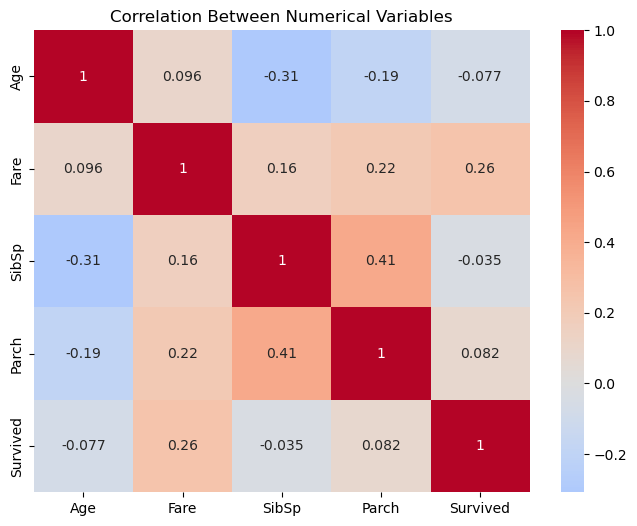


Survival Rates by Passenger Class (%):
Survived          0          1
Pclass                        
1         37.037037  62.962963
2         52.717391  47.282609
3         75.763747  24.236253


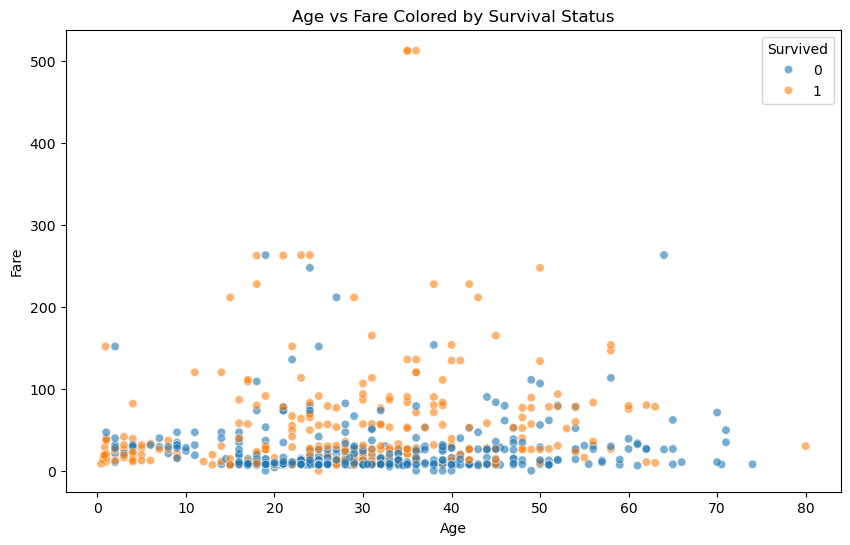

In [8]:
# Correlation analysis
correlation_matrix = df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Numerical Variables')
plt.show()

# Survival rates by passenger class
class_survival = pd.crosstab(df['Pclass'], df['Survived'], 
                            values=df['PassengerId'], 
                            aggfunc='count', 
                            normalize='index') * 100

print("\nSurvival Rates by Passenger Class (%):")
print(class_survival)

# Age vs Fare colored by survival
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', alpha=0.6)
plt.title('Age vs Fare Colored by Survival Status')
plt.show()


In [9]:
import missingno as msno

# Missing data visualization
plt.figure(figsize=(10, 5))
msno.matrix(df)
plt.title('Patterns in Missing Data')
plt.show()

# Outlier analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Fare'])
plt.title('Fare Distribution with Outliers')

plt.subplot(1, 2, 2)
sns.violinplot(y=df['Age'])
plt.title('Age Distribution with Density')
plt.tight_layout()
plt.show()

# Interactive visualization
import plotly.express as px
fig = px.scatter(df, x='Age', y='Fare', color='Survived',
                 hover_data=['Name', 'Pclass', 'Sex'],
                 title='Interactive Exploration of Age vs Fare by Survival')
fig.show()


ModuleNotFoundError: No module named 'missingno'

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

# Prepare data for imputation
impute_data = df[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']].copy()

# KNN Imputation (k=5 nearest neighbors)
knn_imputer = KNNImputer(n_neighbors=5)
impute_data_knn = impute_data.copy()
impute_data_knn['Age'] = knn_imputer.fit_transform(impute_data)[:, 0]

# MICE Imputation (Multiple Imputation by Chained Equations)
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
impute_data_mice = impute_data.copy()
impute_data_mice['Age'] = mice_imputer.fit_transform(impute_data)[:, 0]

# Compare results
print(f"Original Age median: {impute_data['Age'].median():.1f}")
print(f"KNN-imputed Age median: {impute_data_knn['Age'].median():.1f}")
print(f"MICE-imputed Age median: {impute_data_mice['Age'].median():.1f}")

# Visualize distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.histplot(impute_data['Age'].dropna(), bins=30, kde=True)
plt.title('Original Age (Complete Cases)')

plt.subplot(1, 3, 2)
sns.histplot(impute_data_knn['Age'], bins=30, kde=True)
plt.title('KNN-Imputed Age')

plt.subplot(1, 3, 3)
sns.histplot(impute_data_mice['Age'], bins=30, kde=True)
plt.title('MICE-Imputed Age')
plt.tight_layout()
plt.show()


Isolation Forest outliers: 42
DBSCAN outliers: 3


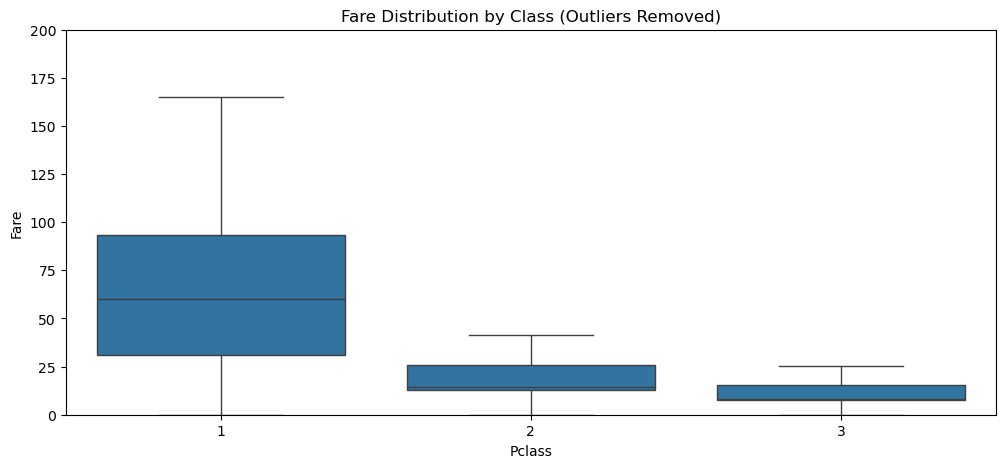


Original Fare > $200 count: 20
Winsorized Fare > $200 count: 0


In [20]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

# Fare outlier detection
fare_data = df[['Fare']].copy().dropna()

# Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso_forest.fit_predict(fare_data)
fare_data['iso_outlier'] = outlier_pred == -1

# DBSCAN
dbscan = DBSCAN(eps=50, min_samples=5)
fare_data['dbscan_outlier'] = dbscan.fit_predict(fare_data) == -1

# Compare results
print(f"Isolation Forest outliers: {fare_data['iso_outlier'].sum()}")
print(f"DBSCAN outliers: {fare_data['dbscan_outlier'].sum()}")

# Visualize fare distribution with outliers
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Pclass'], y=df['Fare'], showfliers=False)
plt.title('Fare Distribution by Class (Outliers Removed)')
plt.ylim(0, 200)
plt.show()

# Apply winsorization (capping extreme values)
from scipy.stats.mstats import winsorize
df['Fare_winsorized'] = winsorize(df['Fare'], limits=[0.05, 0.05])

# Compare original vs. treated fare
print(f"\nOriginal Fare > $200 count: {(df['Fare'] > 200).sum()}")
print(f"Winsorized Fare > $200 count: {(df['Fare_winsorized'] > 200).sum()}")


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer

# Load and prepare base data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# ----- Numerical Feature Engineering -----
# Age binning
df['Age_group'] = pd.cut(df['Age'], 
                         bins=[0, 12, 18, 60, 100],
                         labels=['child', 'teen', 'adult', 'senior'])

# Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
numeric_features = df[['Age', 'Fare']].fillna(df.median())
poly_features = poly.fit_transform(numeric_features)
df[['Age', 'Fare', 'Age*Fare']] = poly_features

# Family size feature
df['Family_size'] = df['SibSp'] + df['Parch'] + 1
df['Is_alone'] = (df['Family_size'] == 1).astype(int)

# ----- Text Feature Engineering -----
# Extract titles from names
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Sir', 'Don', 'Jonkheer'], 'Noble')

# ----- Interaction Features -----
df['Class*Sex'] = df['Pclass'].astype(str) + "_" + df['Sex']

# Display engineered features
print(df[['Name', 'Title', 'Age_group', 'Family_size', 'Class*Sex']].head(8))


<>:28: SyntaxWarning: invalid escape sequence '\.'
<>:28: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Asus\AppData\Local\Temp\ipykernel_3592\4220399780.py:28: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\Asus\AppData\Local\Temp\ipykernel_3592\4220399780.py:28: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


TypeError: Cannot convert [['Braund, Mr. Owen Harris'
  'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
  'Heikkinen, Miss. Laina' ... 'Johnston, Miss. Catherine Helen "Carrie"'
  'Behr, Mr. Karl Howell' 'Dooley, Mr. Patrick']
 ['male' 'female' 'female' ... 'female' 'male' 'male']
 ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' ... 'W./C. 6607' '111369'
  '370376']
 [nan 'C85' nan ... nan 'C148' nan]
 ['S' 'C' 'S' ... 'S' 'C' 'Q']] to numeric

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# ----- Advanced Text Features -----
# Create cabin letter feature (from first character)
df['Cabin_letter'] = df['Cabin'].str[0]

# TF-IDF on names (hypothesizing certain names had status)
tfidf = TfidfVectorizer(max_features=10)
name_features = tfidf.fit_transform(df['Name'].fillna(''))
svd = TruncatedSVD(n_components=3)
name_svd = svd.fit_transform(name_features)
df[['Name_factor1', 'Name_factor2', 'Name_factor3']] = name_svd

# ----- Geospatial Simulation -----
# Simulate deck positions (for demonstration)
np.random.seed(42)
df['Deck_x'] = np.random.uniform(0, 100, len(df))
df['Deck_y'] = np.random.uniform(0, 20, len(df))
df['Distance_to_stairs'] = np.sqrt((df['Deck_x']-50)**2 + (df['Deck_y']-10)**2)

# ----- Feature Selection Preview -----
corr_with_target = df.corr()['Survived'].abs().sort_values(ascending=False)
print("\nFeature correlation with survival:")
print(corr_with_target.head(10))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(


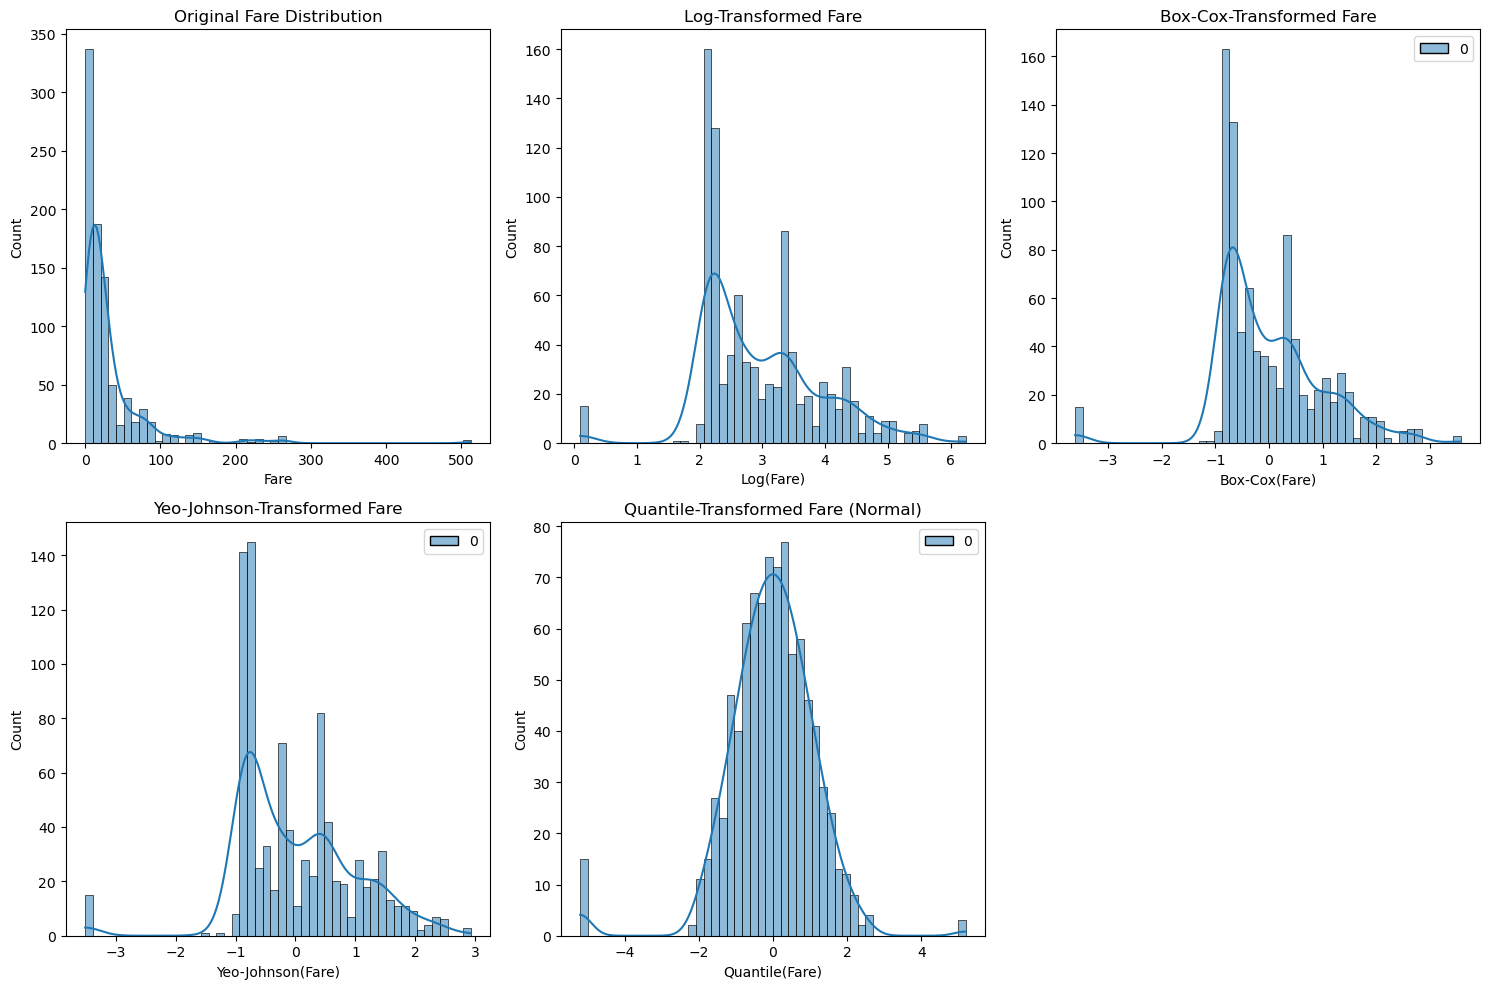

Original Fare Skewness: 4.78
Log-Transformed Skewness: 0.44
Box-Cox Skewness: 0.11
Yeo-Johnson Skewness: -0.04
Quantile Skewness: -0.93


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Extract Fare column and handle zeros (Box-Cox requires positive values)
fare = df['Fare'].copy()
fare = fare.replace(0, 0.1)  # Replace 0 with a small positive value

# Apply transformations
# Log transformation
fare_log = np.log1p(fare)  # log1p handles zeros gracefully by computing log(1 + x)

# Box-Cox transformation
boxcox_transformer = PowerTransformer(method='box-cox', standardize=True)
fare_boxcox = boxcox_transformer.fit_transform(fare.values.reshape(-1, 1))

# Yeo-Johnson transformation
yeojohnson_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
fare_yeojohnson = yeojohnson_transformer.fit_transform(fare.values.reshape(-1, 1))

# Quantile transformation (to normal distribution)
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
fare_quantile = quantile_transformer.fit_transform(fare.values.reshape(-1, 1))

# Visualization
plt.figure(figsize=(15, 10))

# Original Fare
plt.subplot(2, 3, 1)
sns.histplot(fare, bins=50, kde=True)
plt.title('Original Fare Distribution')
plt.xlabel('Fare')

# Log-transformed Fare
plt.subplot(2, 3, 2)
sns.histplot(fare_log, bins=50, kde=True)
plt.title('Log-Transformed Fare')
plt.xlabel('Log(Fare)')

# Box-Cox-transformed Fare
plt.subplot(2, 3, 3)
sns.histplot(fare_boxcox, bins=50, kde=True)
plt.title('Box-Cox-Transformed Fare')
plt.xlabel('Box-Cox(Fare)')

# Yeo-Johnson-transformed Fare
plt.subplot(2, 3, 4)
sns.histplot(fare_yeojohnson, bins=50, kde=True)
plt.title('Yeo-Johnson-Transformed Fare')
plt.xlabel('Yeo-Johnson(Fare)')

# Quantile-transformed Fare
plt.subplot(2, 3, 5)
sns.histplot(fare_quantile, bins=50, kde=True)
plt.title('Quantile-Transformed Fare (Normal)')
plt.xlabel('Quantile(Fare)')

plt.tight_layout()
plt.show()

# Print skewness for comparison
print(f"Original Fare Skewness: {stats.skew(fare):.2f}")
print(f"Log-Transformed Skewness: {stats.skew(fare_log):.2f}")
print(f"Box-Cox Skewness: {stats.skew(fare_boxcox.flatten()):.2f}")
print(f"Yeo-Johnson Skewness: {stats.skew(fare_yeojohnson.flatten()):.2f}")
print(f"Quantile Skewness: {stats.skew(fare_quantile.flatten()):.2f}")


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess Titanic data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Feature engineering (from prior sections)
df['Family_size'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).replace(['Mlle', 'Ms'], 'Miss')
df['Fare_log'] = np.log1p(df['Fare'])
df = df.dropna(subset=['Age'])  # Drop rows with missing Age for simplicity

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Title'] = le.fit_transform(df['Title'].fillna('Unknown'))

# Define features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare_log', 'Family_size', 'Title']]
y = df['Survived']

# --- Filter Methods ---
# Variance Threshold
vt = VarianceThreshold(threshold=0.1)
X_vt = vt.fit_transform(X)
print("Features after Variance Threshold:", X.columns[vt.get_support()].tolist())

# Correlation (Pearson)
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')
plt.show()

# Statistical Tests (Select top 3 features)
kbest_chi2 = SelectKBest(chi2, k=3).fit(X.abs(), y)  # abs() for chi2 (non-negative)
print("Top 3 (Chi2):", X.columns[kbest_chi2.get_support()].tolist())

kbest_anova = SelectKBest(f_classif, k=3).fit(X, y)
print("Top 3 (ANOVA):", X.columns[kbest_anova.get_support()].tolist())

kbest_mi = SelectKBest(mutual_info_classif, k=3).fit(X, y)
print("Top 3 (Mutual Info):", X.columns[kbest_mi.get_support()].tolist())

# --- Wrapper Method: RFE ---
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=3)
rfe_fit = rfe.fit(X, y)
print("Top 3 (RFE):", X.columns[rfe_fit.support_].tolist())

# --- Embedded Methods ---
# Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
print("Lasso Non-Zero Features:", lasso_coef[lasso_coef != 0].index.tolist())

# Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 4))
importances.sort_values().plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

# SHAP Values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values[1], X, plot_type="bar")


<>:17: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Asus\AppData\Local\Temp\ipykernel_3592\2858020127.py:17: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).replace(['Mlle', 'Ms'], 'Miss')
C:\Users\Asus\AppData\Local\Temp\ipykernel_3592\2858020127.py:17: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).replace(['Mlle', 'Ms'], 'Miss')


ModuleNotFoundError: No module named 'shap'

In [29]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from category_encoders import OneHotEncoder, TargetEncoder, LeaveOneOutEncoder, HashingEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Simulate a categorical feature (e.g., region based on longitude bins)
X['Region'] = pd.cut(X['Longitude'], bins=5, labels=['West', 'Mid-West', 'Central', 'Mid-East', 'East'])

# --- Scaling Techniques ---
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()
scaler_quantile = QuantileTransformer(output_distribution='normal', random_state=42)

# Scale Median Income
X['MedInc_Std'] = scaler_std.fit_transform(X[['MedInc']])
X['MedInc_MinMax'] = scaler_minmax.fit_transform(X[['MedInc']])
X['MedInc_Robust'] = scaler_robust.fit_transform(X[['MedInc']])
X['MedInc_Quantile'] = scaler_quantile.fit_transform(X[['MedInc']])

# Visualize scaling effects
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.histplot(X['MedInc'], bins=50, kde=True)
plt.title('Original Median Income')
plt.subplot(2, 2, 2)
sns.histplot(X['MedInc_Std'], bins=50, kde=True)
plt.title('Standardized Median Income')
plt.subplot(2, 2, 3)
sns.histplot(X['MedInc_MinMax'], bins=50, kde=True)
plt.title('Min-Max Normalized Median Income')
plt.subplot(2, 2, 4)
sns.histplot(X['MedInc_Quantile'], bins=50, kde=True)
plt.title('Quantile Normalized Median Income')
plt.tight_layout()
plt.show()

# --- Encoding Techniques ---
# One-Hot Encoding
ohe = OneHotEncoder(cols=['Region'])
X_ohe = ohe.fit_transform(X)

# Target Encoding
te = TargetEncoder(cols=['Region'])
X_te = X.copy()
X_te['Region'] = te.fit_transform(X['Region'], y)

# Leave-One-Out Encoding
loo = LeaveOneOutEncoder(cols=['Region'])
X_loo = X.copy()
X_loo['Region'] = loo.fit_transform(X['Region'], y)

# Hashing Encoder
he = HashingEncoder(cols=['Region'], n_components=3)
X_he = he.fit_transform(X)

# Display encoding results
print("One-Hot Encoded Region (first 5 rows):")
print(X_ohe[['Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5']].head())
print("\nTarget Encoded Region (first 5 rows):")
print(X_te['Region'].head())
print("\nLeave-One-Out Encoded Region (first 5 rows):")
print(X_loo['Region'].head())
print("\nHashing Encoded Region (first 5 rows):")
print(X_he[['col_0', 'col_1', 'col_2']].head())


ModuleNotFoundError: No module named 'category_encoders'

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits  # Fallback if MNIST loading fails
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import umap
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load MNIST dataset (full 28x28 version)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape(-1, 784)[:10000]  # Flatten to 784 features, take 10k samples for speed
y = y_train[:10000]
X = X / 255.0  # Normalize pixel values to 0-1

# --- Linear Methods ---
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(f"PCA Explained Variance Ratio: {sum(pca.explained_variance_ratio_):.3f}")

# Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)

# LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# --- Non-linear Methods ---
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Autoencoder
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(2, activation='relu')(encoded)  # Bottleneck
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=10, batch_size=256, verbose=0)
X_auto = encoder.predict(X)

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for ax, data, title in zip(axes.flatten(), 
                           [X_pca, X_fa, X_lda, X_tsne, X_umap, X_auto], 
                           ['PCA', 'Factor Analysis', 'LDA', 't-SNE', 'UMAP', 'Autoencoder']):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=y, cmap='tab10', s=5)
    ax.set_title(title)
    plt.colorbar(scatter, ax=ax)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'umap'

C:\Users\Asus\AppData\Local\Temp\ipykernel_3592\2495318633.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = pd.DataFrame({'Passengers': data['value'], 'Time': pd.date_range(start='1949-01-01', periods=len(data), freq='M')})


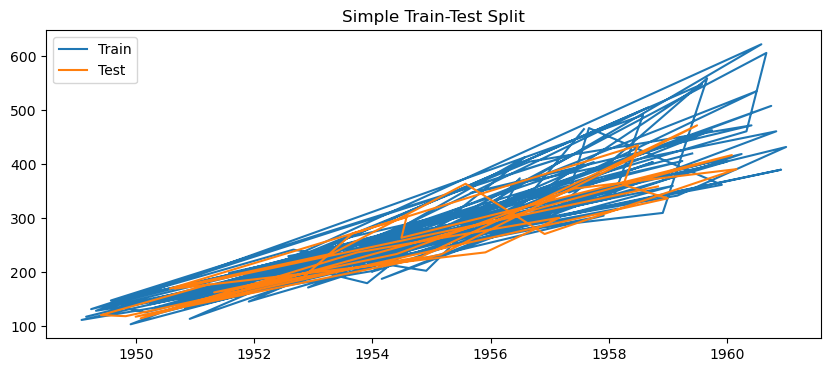

Stratified Train High Season Ratio: 0.50
Stratified Test High Season Ratio: 0.48


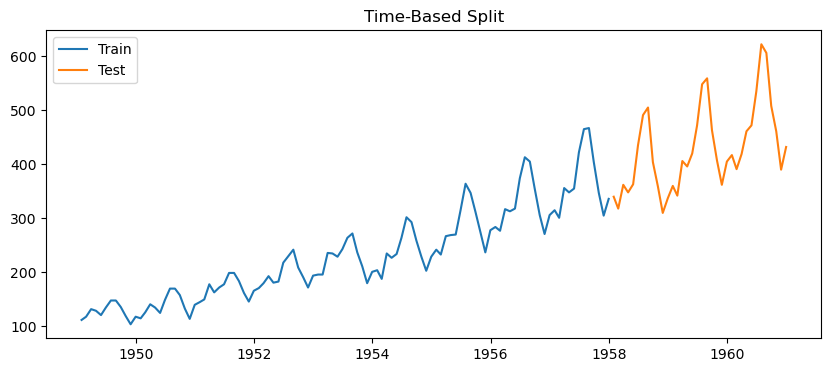

K-Fold 1: Train 115, Test 29
K-Fold 2: Train 115, Test 29
K-Fold 3: Train 115, Test 29
K-Fold 4: Train 115, Test 29
K-Fold 5: Train 116, Test 28
LOO First 5 Splits: [(143, 1), (143, 1), (143, 1), (143, 1), (143, 1)]


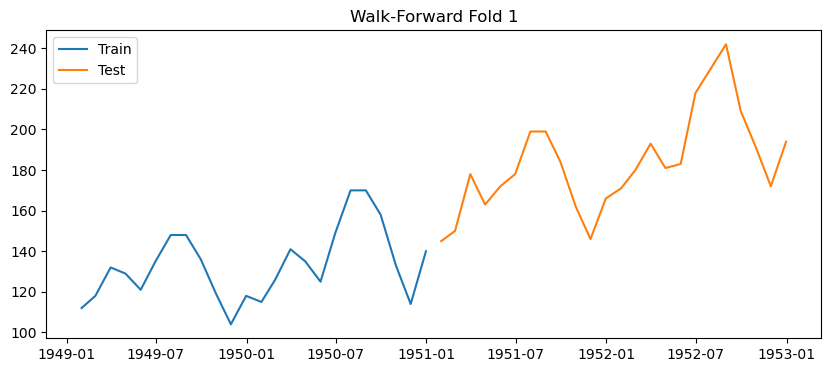

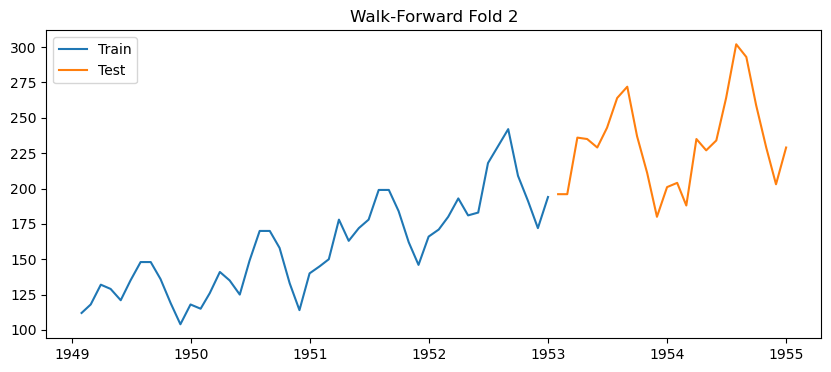

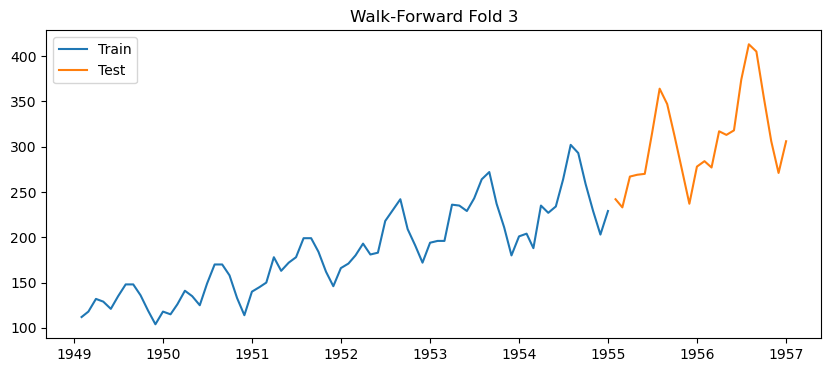

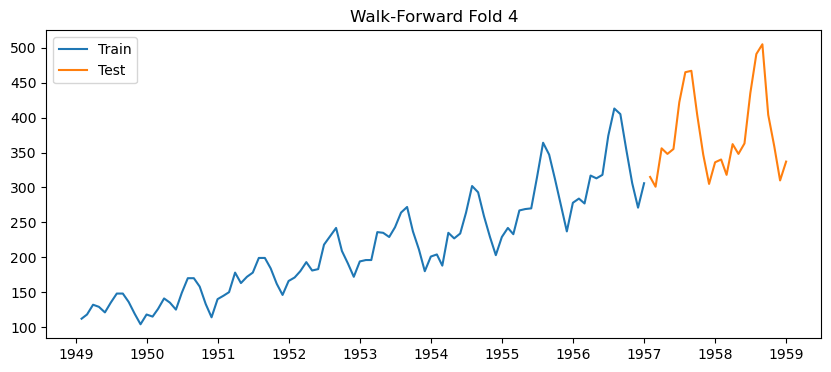

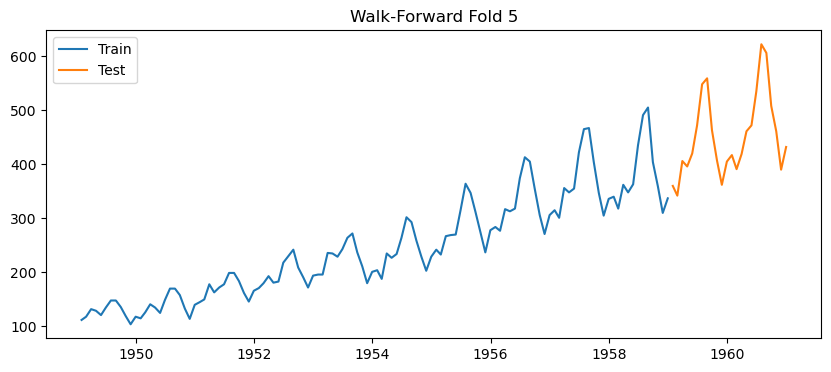

Group K-Fold 1: Train Groups [1949 1951 1952 1953 1954 1956 1957 1958 1959]
Group K-Fold 2: Train Groups [1950 1951 1952 1953 1955 1956 1957 1958 1960]
Group K-Fold 3: Train Groups [1949 1950 1951 1952 1954 1955 1956 1957 1959 1960]
Group K-Fold 4: Train Groups [1949 1950 1951 1953 1954 1955 1956 1958 1959 1960]
Group K-Fold 5: Train Groups [1949 1950 1952 1953 1954 1955 1957 1958 1959 1960]


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, TimeSeriesSplit, LeaveOneOut, GroupKFold
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset

# Load Airline Passengers dataset
data = get_rdataset("AirPassengers", "datasets").data
df = pd.DataFrame({'Passengers': data['value'], 'Time': pd.date_range(start='1949-01-01', periods=len(data), freq='M')})

# Synthetic features for demonstration
df['Season'] = df['Time'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
                                        6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 
                                        11: 'Fall', 12: 'Winter'})
df['High_Season'] = (df['Passengers'] > df['Passengers'].median()).astype(int)  # Binary target for stratification
df['Group'] = df['Time'].dt.year  # Years as groups

# --- Simple Train-Test Split ---
train, test = train_test_split(df, test_size=0.2, random_state=42)
plt.figure(figsize=(10, 4))
plt.plot(train['Time'], train['Passengers'], label='Train')
plt.plot(test['Time'], test['Passengers'], label='Test')
plt.title('Simple Train-Test Split')
plt.legend()
plt.show()

# --- Stratified Split (using synthetic binary target) ---
train_strat, test_strat = train_test_split(df, test_size=0.2, stratify=df['High_Season'], random_state=42)
print(f"Stratified Train High Season Ratio: {train_strat['High_Season'].mean():.2f}")
print(f"Stratified Test High Season Ratio: {test_strat['High_Season'].mean():.2f}")

# --- Time-Based Split ---
split_date = '1958-01-01'
train_time = df[df['Time'] < split_date]
test_time = df[df['Time'] >= split_date]
plt.figure(figsize=(10, 4))
plt.plot(train_time['Time'], train_time['Passengers'], label='Train')
plt.plot(test_time['Time'], test_time['Passengers'], label='Test')
plt.title('Time-Based Split')
plt.legend()
plt.show()

# --- Cross-Validation Techniques ---
# K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, test_idx) in enumerate(kf.split(df, df['High_Season'])):
    print(f"K-Fold {fold+1}: Train {len(train_idx)}, Test {len(test_idx)}")

# Leave-One-Out
loo = LeaveOneOut()
loo_splits = list(loo.split(df))
print(f"LOO First 5 Splits: {[(len(train), len(test)) for train, test in loo_splits[:5]]}")

# Walk-Forward (Time Series)
tscv = TimeSeriesSplit(n_splits=5)
for fold, (train_idx, test_idx) in enumerate(tscv.split(df)):
    train_time_cv = df.iloc[train_idx]['Time']
    test_time_cv = df.iloc[test_idx]['Time']
    plt.figure(figsize=(10, 4))
    plt.plot(train_time_cv, df.iloc[train_idx]['Passengers'], label='Train')
    plt.plot(test_time_cv, df.iloc[test_idx]['Passengers'], label='Test')
    plt.title(f'Walk-Forward Fold {fold+1}')
    plt.legend()
    plt.show()

# Group K-Fold
gkf = GroupKFold(n_splits=5)
for fold, (train_idx, test_idx) in enumerate(gkf.split(df, groups=df['Group'])):
    print(f"Group K-Fold {fold+1}: Train Groups {df.iloc[train_idx]['Group'].unique()}")


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
import featuretools as ft
from sklearn.base import BaseEstimator, TransformerMixin

# Load Credit Card Fraud dataset
df = pd.read_csv('creditcard.csv')  # Adjust path as needed
X = df.drop(columns=['Class'])
y = df['Class']

# --- Handling Class Imbalance ---
# SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"SMOTE Train Class Distribution: {np.bincount(y_train_smote)}")

# Cost-Sensitive Learning
clf_cost = LogisticRegression(class_weight='balanced', max_iter=1000)
clf_cost.fit(X_train, y_train)
y_pred_cost = clf_cost.predict(X_test)
print("Cost-Sensitive Classification Report:")
print(classification_report(y_test, y_pred_cost))

# --- Data Leakage Prevention ---
# Wrong Way: Scaling before split (leakage)
scaler_leak = StandardScaler().fit(X)
X_scaled_leak = scaler_leak.transform(X)
X_train_leak, X_test_leak, _, _ = train_test_split(X_scaled_leak, y, test_size=0.2)

# Pipeline (Correct Way)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train_raw, y_train_raw)
y_pred_pipe = pipeline.predict(X_test_raw)
print("Pipeline Classification Report:")
print(classification_report(y_test_raw, y_pred_pipe))

# --- Automated Preprocessing ---
# FeatureTools
es = ft.EntitySet(id='credit_data')
es = es.add_dataframe(dataframe_name='transactions', dataframe=df, index='index', time_index='Time')
features, feature_defs = ft.dfs(entityset=es, target_dataframe_name='transactions', max_depth=2)
print(f"FeatureTools Generated {len(feature_defs)} Features, e.g.: {feature_defs[:3]}")

# Custom Transformer
class AmountBinningTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, bins=5):
        self.bins = bins
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_copy = X.copy()
        X_copy['Amount_Binned'] = pd.qcut(X_copy['Amount'], q=self.bins, labels=False, duplicates='drop')
        return X_copy

pipeline_custom = Pipeline([
    ('binning', AmountBinningTransformer(bins=5)),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])
pipeline_custom.fit(X_train_raw, y_train_raw)
y_pred_custom = pipeline_custom.predict(X_test_raw)
print("Custom Transformer Pipeline Report:")
print(classification_report(y_test_raw, y_pred_custom))


ModuleNotFoundError: No module named 'featuretools'

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from feature_engine.outliers import Winsorizer
from category_encoders import TargetEncoder
from sklearn.metrics import classification_report
from joblib import Parallel, delayed, dump
import featuretools as ft

# Load Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')
df['Quality'] = (df['quality'] >= 7).astype(int)  # Binarize quality
X = df.drop(columns=['quality', 'Quality'])
y = df['Quality']

# Synthetic categorical feature
X['Alcohol_Level'] = pd.qcut(X['alcohol'], q=3, labels=['Low', 'Medium', 'High'])

# --- Pipeline Implementation ---
pipeline = Pipeline([
    ('winsorizer', Winsorizer(tail='both', fold=2)),  # Cap outliers
    ('scaler', StandardScaler()),
    ('encoder', TargetEncoder(cols=['Alcohol_Level'])),
    ('clf', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Pipeline Classification Report:")
print(classification_report(y_test, y_pred))

# --- Parallel Processing ---
def train_fold(X_train, y_train, fold):
    pipeline.fit(X_train, y_train)
    return fold

results = Parallel(n_jobs=4)(delayed(train_fold)(X_train, y_train, i) for i in range(5))
print(f"Parallel Fold Results: {results}")

# --- Production Considerations ---
# Save pipeline for versioning
dump(pipeline, 'wine_quality_pipeline.joblib')

# FeatureTools Automation
es = ft.EntitySet(id='wine_data')
es = es.add_dataframe(dataframe_name='wines', dataframe=df, index='index')
features, feature_defs = ft.dfs(entityset=es, target_dataframe_name='wines', max_depth=2)
print(f"FeatureTools Generated {len(feature_defs)} Features, e.g.: {feature_defs[:3]}")

# Simulate data drift check (simple mean shift)
new_data = X.copy()
new_data['alcohol'] *= 1.1  # Simulate 10% increase
drift_stat = (new_data['alcohol'].mean() - X['alcohol'].mean()) / X['alcohol'].std()
print(f"Alcohol Mean Drift (in SDs): {drift_stat:.2f}")


ModuleNotFoundError: No module named 'feature_engine'